# googleReviewTextcloud 코드 설명 
* 토크나이저 비교하여 텍스트 클라우드의 명사 추출을 기반으로 보여주기 위한 코드 

## 라이브러리 설정

In [1]:
import pandas as pd
import os
from tqdm import tqdm

import warnings

warnings.filterwarnings(action='ignore')

### 토크나이저

In [2]:
from soynlp.noun import LRNounExtractor
from soynlp.noun import LRNounExtractor_v2
from soynlp.noun import NewsNounExtractor
from konlpy.tag import Mecab, Komoran
from khaiii import KhaiiiApi
import re

api = KhaiiiApi()
mecab = Mecab()
komoran = Komoran()

### 시각화 라이브러리 설정

In [3]:
import seaborn as sns
import graphviz

In [4]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('설정 파일 위치: ', mpl.matplotlib_fname())

import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

설정 파일 위치:  /home/aiffel-dj19/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [5]:
# rc('font', family='/home/aiffel-dj19/jungcheck/DataPreprocessing/KoPubDotumBold.ttf')
plt.rcParams["font.family"] = 'NanumBarunGothic'

In [6]:
SMALL_SIZE = 9
MEDIUM_SIZE = 12
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE )   
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud 

## 경로 설정

In [8]:
!pwd

/home/aiffel-dj19/jungcheck/DataPreprocessing


In [9]:
data_path = os.getcwd() + '/filtered/google_review/'

In [10]:
target = 'labeled_spellcheck_8420'

In [11]:
data_path + target

'/home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/google_review/labeled_spellcheck_8420'

In [12]:
keywords = ['장태산',
 '계족산',
 '동춘당',
 '으능정이문화의거리',
 '뿌리공원',
 '엑스포과학공원',
 '성심당',
 '수통골',
 '유성온천',
 '한밭수목원',
 '국립중앙과학관',
 '대청호',
 '대전문화예술단지',
 '시민천문대',
 '오월드']

In [13]:
# keyword_list = data_df.search.unique()
keywords_ko = [file_name for file_name in keywords]
keywords_en = ['jangtae_mountain', 'gyejok_mountain', 'dongchundang', 'uineungjeongi_street', 'ppuri_park', 
               'expo_science_park', 'sungsimdang_bakery', 'water_barrel', 'yuseong_hotspring', 'hanbat_arboretum', 
               'science_museum','daecheong_lake', 'art_culture_complex', 'observatory', 
               'oworld_zoo']

keywords = {k:v for k, v in zip(keywords_ko, keywords_en)}
keywords

{'장태산': 'jangtae_mountain',
 '계족산': 'gyejok_mountain',
 '동춘당': 'dongchundang',
 '으능정이문화의거리': 'uineungjeongi_street',
 '뿌리공원': 'ppuri_park',
 '엑스포과학공원': 'expo_science_park',
 '성심당': 'sungsimdang_bakery',
 '수통골': 'water_barrel',
 '유성온천': 'yuseong_hotspring',
 '한밭수목원': 'hanbat_arboretum',
 '국립중앙과학관': 'science_museum',
 '대청호': 'daecheong_lake',
 '대전문화예술단지': 'art_culture_complex',
 '시민천문대': 'observatory',
 '오월드': 'oworld_zoo'}

## 데이터 불러오기

In [14]:
def concatCsv(root_path):
    folder_path = os.path.join(root_path, target)
    print(f'folder name: {folder_path}')

    data_list = []    
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        print(f'file path: {file_path}')

        df = pd.read_csv(file_path, encoding='utf-8')  # csv 파일 읽기
        print(f'해당 파일의 데이터 개수: {len(df)}')
        print()
        data_list.append(df)
        print('-'*40)

    df = pd.concat(data_list, axis=0)
    print(target, '총 데이터 개수: ', len(df))
    return df

In [15]:
data_df = concatCsv(data_path)

folder name: /home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/google_review/labeled_spellcheck_8420
file path: /home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/google_review/labeled_spellcheck_8420/google_reviews_daecheong_lake.csv
해당 파일의 데이터 개수: 491

----------------------------------------
file path: /home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/google_review/labeled_spellcheck_8420/google_reviews_sungsimdang_bakery.csv
해당 파일의 데이터 개수: 1863

----------------------------------------
file path: /home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/google_review/labeled_spellcheck_8420/google_reviews_water_barrel.csv
해당 파일의 데이터 개수: 685

----------------------------------------
file path: /home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/google_review/labeled_spellcheck_8420/google_reviews_observatory.csv
해당 파일의 데이터 개수: 26

----------------------------------------
file path: /home/aiffel-dj19/jungcheck/DataPreprocessing/filtered/google_review/labeled_spellcheck_

In [16]:
data_df.head()

name  ratings   date                                            comment  \
0  유레카        5   5달 전  참으로 아름다운 호수다 왜 이제서야 와 봤을까 하는 생각이 든다 개발되면 교통이 불...   
1  이정주        5   6달 전  청남대를 품고 있는 매우 아름다운 호수 대통령 별장이 자리 잡을 정도로 경치와 장소...   
2  송병석        4  10달 전                                           사진 찍기 명소   
3  배진환        5   1년 전                                      날씨가 너무 좋고 예뻤다   
4  오재열        5   1년 전                   사계절 항상 아름답고 접근성도 좋아 방문자가 많은 곳입니다   

  search         keyword  label  
0    대청호  daecheong_lake      1  
1    대청호  daecheong_lake      1  
2    대청호  daecheong_lake      1  
3    대청호  daecheong_lake      1  
4    대청호  daecheong_lake      1

In [17]:
comment_list = data_df['comment']
comment_list

0      참으로 아름다운 호수다 왜 이제서야 와 봤을까 하는 생각이 든다 개발되면 교통이 불...
1      청남대를 품고 있는 매우 아름다운 호수 대통령 별장이 자리 잡을 정도로 경치와 장소...
2                                               사진 찍기 명소
3                                          날씨가 너무 좋고 예뻤다
4                       사계절 항상 아름답고 접근성도 좋아 방문자가 많은 곳입니다
                             ...                        
376                                               좋은 전시회
377                 아이들이 좋아하는 공룡 놀이터 별건 없어도 공룡만 있으면 좋은 듯
378              저렴한 입장료에 구성비 최고입니다 놀 거리 볼거리 좋은 장소 강추합니다
379    입장료가 무료라 좋습니다 유료 시설도 있으나 많이 저렴한 편이라 부담은 없습니다 단...
380                                      아이들과 알찬 시간이었습니다
Name: comment, Length: 8420, dtype: object

## 토크나이저 비교 

In [18]:
noun_list = []
for sen in data_df['comment']:
#     print(mecab.nouns(sen))
    noun_list = noun_list + mecab.nouns(sen)
print(noun_list[:10])

['호수', '생각', '개발', '교통', '불편', '수', '산길', '도로', '강', '사람']


In [19]:
noun_list = []
for sen in data_df['comment']:
#     print(komoran.nouns(sen))
    noun_list = noun_list + komoran.nouns(sen)

print(noun_list[:10])

['호', '수다', '생각', '개발', '교통', '불편', '수', '산길', '강', '사람']


Komoran이 mecab에 비해 성능이 좋지 않음을 위와 같은 경우를 예시로 알 수 있다.    
호수 => 호, 수 
도로 => " " 

## Soynlp로 알려지지 않은 명사 추출 

In [20]:
def get_noun_sorted_by_frequency(noun_extractor):
    """
    Description
    이미 학습되어 있는 noun_extractor의 noun을 
    frequency 내림차순으로 정렬하여 리턴함.
    """
    return_lst = list()
    nouns = noun_extractor.extract()
    for (each_noun, each_noun_info) in nouns.items():
        each_noun_dict = {
            "noun": each_noun,
            "frequency": each_noun_info.frequency, 
            "score": each_noun_info.score
        }
        return_lst.append(each_noun_dict)
    return_lst = sorted(return_lst, key=lambda x: x['frequency'], reverse=True)
    return return_lst

In [21]:
noun_extractor_dict = {
    "LRNounExtractor": LRNounExtractor(verbose=False), 
    "LRNounExtractor_v2": LRNounExtractor_v2(verbose=False), 
    "NewsNounExtractor": NewsNounExtractor(verbose=False)
}

/home/aiffel-dj19/anaconda3/envs/aiffel/lib/python3.7/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment


## 빈도수 기반 시각화

In [22]:
def showGraph(word_dict, keyword):
    plt.figure(figsize=(20, 7))
    plt.title('전체 데이터셋의 키워드 CountVectorize 결과', fontsize = 20)
    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)

    Sorted_Dict_Values = sorted(word_dict.values(), reverse=True)
    Sorted_Dict_Keys = sorted(word_dict, key=word_dict.get, reverse=True)

    plt.bar(range(len(word_dict)), Sorted_Dict_Values, align='center', color='r', alpha=0.4)
    plt.xticks(range(len(word_dict)), list(Sorted_Dict_Keys), rotation='70')
    
    plt.savefig(f'figure/google_review_{keyword}.png')
    plt.show()

## keyword 지정 후 전체 과정 진행

In [23]:
keyword = 'all'

==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 6714
_noun_scores_ 1768
after postprocessing 1119
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '합니다', '추천합니다', '보입니다', '좋아합니다', '가능합니다', '강추합니다', '생각합니다', '필요합니다', '감사합니다', '훌륭합니다', '행복합니다', '만족합니다', '저렴합니다', '유명합니다', '친절합니다', '깨끗합니다', '볼만합니다', '시원합니다', '부족합니다', '다양합니다', '깔끔합니다', '편리합니다', '제공합니다', '불편합니다', '혼잡합니다', '비슷합니다', '편안합니다', '사랑합니다', '적합합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '걷기', '걷기', '놀기', '놀기', '좋은데', '맛있음', '맛있음', '좋지', '드라', '많지', '즐기기', '즐기기', '이렇게', '보내기', '보내기', '입구', '찍기', '찍기', '놀다', '힘들지', '늦게', '어렵지', '있기', '있기', 

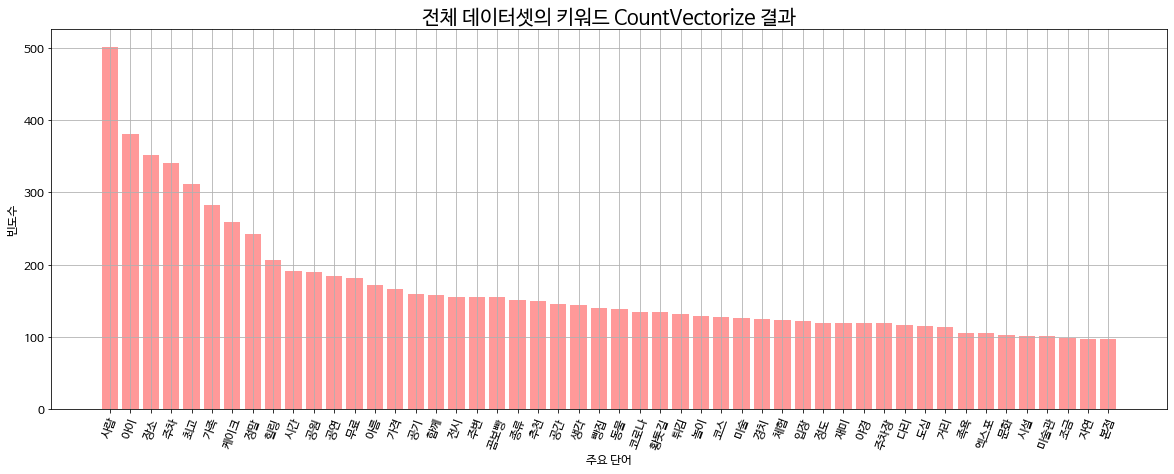


==== 1000 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


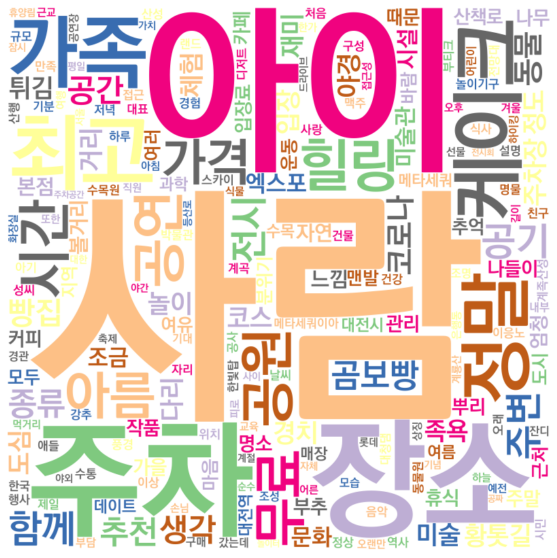

In [24]:
print("==== 명사 추출 ====")
for noun_ext_name, noun_ext in noun_extractor_dict.items():
    # train
    noun_ext.train(data_df['comment'])
    print(f"== extractor: {noun_ext_name}")
    # noun을 빈도 내림차순으로 정렬하여 리턴
    noun_lst = get_noun_sorted_by_frequency(noun_ext)
#     for noun in noun_lst[:20]:
#         print(noun)
    print("--" * 50)

print()
print("==== 마치는 문자 확인 및 명사 분리 ====")
noun_df = pd.DataFrame.from_dict(noun_lst)

stopwords = []
for noun in noun_df['noun']:
    if noun.endswith('아요') or noun.endswith('니다') or noun.endswith('어요') or noun.endswith('하니'):
        stopwords.append(noun)
        noun_df = noun_df[noun_df['noun'] != noun]
        noun_list = mecab.nouns(noun)
        if len(noun_list) > 1:
            for n in noun_list:
                noun_df['noun'].append(n)
                print('추가 단어: ', n)
        
print('제거된 단어들: ', stopwords)

print()
print("==== 품사 태깅 기준 용언 및 ETN 제거 ====")
stopwords = []
for noun in noun_df['noun']:
    tag_list = [t for l, t in mecab.pos(noun)]
    for tag in tag_list: 
        if tag in ['VV', 'VX', 'ETN','VA']: # 'VCP', 'VCN', 'VA']: #, 'MAG', 'MAJ', 'ETN', 'XSV']:
            stopwords.append(noun)
            noun_df = noun_df[noun_df['noun'] != noun]
        
print('제거된 단어들: ', stopwords)

print()
print("==== 명사 스코어 낮은 단어 제거 ====")
not_noun_df = noun_df[noun_df['score'] <= 0.25]
is_noun_df = noun_df[noun_df['score'] > 0.25]

print('제거한 단어: ', not_noun_df['noun'].unique())

print()
print("==== 1글자인 경우는 제거  ====")
is_noun_df = is_noun_df[is_noun_df['noun'].apply(lambda row:len(row)) >= 2]
is_noun_df


print()
print("==== 검색어 키워드 제거  ====")
text_df = is_noun_df.copy()

for i in range(len(is_noun_df)):
    word = is_noun_df['noun'].iloc[i]
    word = word.strip(' ')
    if word in keywords_ko + ['대전']: 
        text_df = text_df[is_noun_df['noun'] != word]  

print()
print("==== 복수 명사 제거  ====")
for i in range(len(text_df)):
    word = text_df['noun'].iloc[i]
#     print('word: ', word , end='')
    if word.endswith('들') and word not in ['아들', '애들']: # 복수 명사 => 단일 명사 
        word = word.strip('들')
        word = word.strip(' ')
        word = re.sub(' +', '', word)
        
    if word.endswith('것') or word in ['것', '곳', '층'] or word == '시간': # 특정 단어 제거 
        word = word.strip('것')
        word = word.strip(' ')
        word = re.sub(' ', '', word)
        word = re.sub('[0-9]', '', word)
        word = word.strip('곳')
        
    word = re.sub(' ', '', word)
    word = re.sub('[0-9]', '', word)
#     print('=> ', word)
    
    if len(word) < 2:
        text_df['noun'].iloc[i] = ''
    else: 
        text_df['noun'].iloc[i] = word
        
print()
print("==== 한 글자 제거  ====")
text_df = text_df[text_df['noun'].map(len) > 1]
print(len(text_df))

print()
print("==== 중복 제거  ====")
text_df = text_df.drop_duplicates(['noun'])
print(len(text_df))

print()
print("==== 동반자 유형에 해당하는 키워드 제거  ====")
companions = {
    '가족친지': ['남매', '자매', '형제', '가족 여행', '아이', '아이들', '가족여행', '아기', '여보', '아내', '남편', '가족', '친척', '사촌', '부모님', '시부모', '장인어른', '아버님', '어머님', '조카', '이모', '고모', '삼촌', '할아버지', '할머니', '친형', '친언니', '친누나', '친동생', '친오빠', '엄마', '아빠', '딸', '아들', '자식'],
    '친구연인': ['데이트', '동기', '후배', '우정 여행', '우정', '선배', '남자친구', '여자친구', '자기', '과동기', '찐친', '절친', '친구', '언니', '동생', '형', '오빠'],
    '직장학교': ['학과', '학교','수학여행', '현장견학', '현장체험', '직장', '회사', '주임님', '회사동료', '사장님', '직장동료', '동료', '직장동기', '회사동기', '회사', '직장선배', '직장후배', '선임', '후임', '부장', '부장님', '차장님', '대리님']
}
companions_list = []
for i in companions.values():
    companions_list = i + companions_list
companions_list[:10]

print()
rank = 50
print(f"==== {rank} 순위까지 사전으로 저장 및 시각화 ====")
text_dict = {}
for i in range(rank):
    n = text_df['noun'].iloc[i]
    f = text_df['frequency'][text_df['noun'] == n].iloc[0]
    text_dict[n] = f

showGraph(text_dict, keyword)

print()
rank = 1000
print(f"==== {rank} 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====")
text_list = []
for i in range(rank):
    n = text_df['noun'].iloc[i]
    f = text_df['frequency'][text_df['noun'] == n].iloc[0]
    text_list.append((n, f))

print()
print("==== 워드 클라우드 시각화 및 저장  ====")
wordcloud = WordCloud(
    font_path = './KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud = wordcloud.generate_from_frequencies(dict(text_list))

array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig(f'figure/wcloud_google_review_{keyword}.png')

In [25]:
for i in komoran.pos('확인 하기'):
    print(i)

('확인', 'NNG')
('하', 'VV')
('기', 'ETN')


In [26]:
# stopwords = []
# for noun in noun_df['noun']:
#     tag_list = [t for l, t in komoran.pos(noun)]
#     for tag in tag_list: 
#         if tag in ['VV', 'VX', 'VCP', 'VCN', 'VA']: #, 'MAG', 'MAJ', 'ETN', 'XSV']:
#             stopwords.append(noun)
#             noun_df = noun_df[noun_df['noun'] != noun]
        
# print('제거된 단어들: ', stopwords)

=> Komoran 사용했을때, 용언을 제거하면,    
제거된 단어들:  ['가을', '갔는데', '한가', '대한', '쉬기', '둔산', '가본', '가본', '트래킹', '대여', '아름다움', '타지', '새치기', '명소임', '왔나', '먹자골목'] 과 같이 실제로 의미있는 명사를 제거할 때가 있음 

In [27]:
# 남아있는지 확인
noun_df['noun'][noun_df['noun'] == '제공합니다']

Series([], Name: noun, dtype: object)

In [28]:
text_df[text_df['noun'] == '성심당']

Empty DataFrame
Columns: [noun, frequency, score]
Index: []

In [29]:
text_df[text_df['noun'] == '계족산']

Empty DataFrame
Columns: [noun, frequency, score]
Index: []

In [30]:
text_df[text_df['noun'] == '대전']

Empty DataFrame
Columns: [noun, frequency, score]
Index: []

In [31]:
import re 

test = '것  '
test = re.sub(' +', '', test)
test

'것'

In [32]:
text_df[text_df['noun'].map(len) <= 1]

Empty DataFrame
Columns: [noun, frequency, score]
Index: []

In [33]:
text_dict

{'사람': 501,
 '아이': 381,
 '장소': 352,
 '주차': 340,
 '최고': 311,
 '가족': 282,
 '케이크': 259,
 '정말': 243,
 '힐링': 207,
 '시간': 191,
 '공원': 190,
 '공연': 184,
 '무료': 182,
 '아름': 172,
 '가격': 167,
 '공기': 160,
 '함께': 158,
 '전시': 156,
 '주변': 156,
 '곰보빵': 155,
 '종류': 151,
 '추천': 150,
 '공간': 146,
 '생각': 145,
 '빵집': 140,
 '동물': 139,
 '코로나': 134,
 '황톳길': 134,
 '튀김': 132,
 '놀이': 129,
 '코스': 128,
 '미술': 127,
 '경치': 125,
 '체험': 124,
 '입장': 122,
 '정도': 120,
 '재미': 120,
 '야경': 120,
 '주차장': 119,
 '다리': 116,
 '도심': 115,
 '거리': 114,
 '족욕': 106,
 '엑스포': 105,
 '문화': 103,
 '시설': 102,
 '미술관': 101,
 '조금': 99,
 '자연': 98,
 '본점': 98}

In [34]:
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(text_df['noun'])
text_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
#text_dtm.index=textdata.index
text_dtm.head()

가격  가격대  가문  가본  가슴  가을  가족  가족단위  가족동반  가족여행  ...  휠링  휴식  휴식공간  휴식장소  \
0   0    0   0   0   0   0   0     0     0     0  ...   0   0     0     0   
1   0    0   0   0   0   0   0     0     0     0  ...   0   0     0     0   
2   0    0   0   0   0   0   0     0     0     0  ...   0   0     0     0   
3   0    0   0   0   0   0   0     0     0     0  ...   0   0     0     0   
4   0    0   0   0   0   0   0     0     0     0  ...   0   0     0     0   

   휴양림  휴일  흙길  흥미  희망  힐링  
0    0   0   0   0   0   0  
1    0   0   0   0   0   0  
2    0   0   0   0   0   0  
3    0   0   0   0   0   0  
4    0   0   0   0   0   0  

[5 rows x 1002 columns]

In [35]:
text_list[:10]

[('사람', 501),
 ('아이', 381),
 ('장소', 352),
 ('주차', 340),
 ('최고', 311),
 ('가족', 282),
 ('케이크', 259),
 ('정말', 243),
 ('힐링', 207),
 ('시간', 191)]

In [36]:
eng2kor = {v:k for k, v in keywords.items()}
eng2kor

{'jangtae_mountain': '장태산',
 'gyejok_mountain': '계족산',
 'dongchundang': '동춘당',
 'uineungjeongi_street': '으능정이문화의거리',
 'ppuri_park': '뿌리공원',
 'expo_science_park': '엑스포과학공원',
 'sungsimdang_bakery': '성심당',
 'water_barrel': '수통골',
 'yuseong_hotspring': '유성온천',
 'hanbat_arboretum': '한밭수목원',
 'science_museum': '국립중앙과학관',
 'daecheong_lake': '대청호',
 'art_culture_complex': '대전문화예술단지',
 'observatory': '시민천문대',
 'oworld_zoo': '오월드'}

In [37]:
def showGraph(word_dict, keyword):
    plt.figure(figsize=(20, 7))
    plt.title(f'{eng2kor[keyword]} 데이터셋의 키워드 CountVectorize 결과', fontsize = 20)
    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)

    Sorted_Dict_Values = sorted(word_dict.values(), reverse=True)
    Sorted_Dict_Keys = sorted(word_dict, key=word_dict.get, reverse=True)

    plt.bar(range(len(word_dict)), Sorted_Dict_Values, align='center', color='r', alpha=0.4)
    plt.xticks(range(len(word_dict)), list(Sorted_Dict_Keys), rotation='70')
    
    plt.savefig(f'figure/google_review_{keyword}.png')
    plt.show()

In [38]:
def keywordCloud(keyword):
    print("==== 명사 추출 ====")
    for noun_ext_name, noun_ext in noun_extractor_dict.items():
        # train
        noun_ext.train(data_df['comment'][data_df['keyword'] == keyword])
        print(f"== extractor: {noun_ext_name}")
        # noun을 빈도 내림차순으로 정렬하여 리턴
        noun_lst = get_noun_sorted_by_frequency(noun_ext)
    #     for noun in noun_lst[:20]:
    #         print(noun)
        print("--" * 50)

    print()
    print("==== 마치는 문자 확인 및 명사 분리 ====")
    noun_df = pd.DataFrame.from_dict(noun_lst)

    stopwords = []
    for noun in noun_df['noun']:
        if noun.endswith('아요') or noun.endswith('니다') or noun.endswith('어요') or noun.endswith('하니'):
            stopwords.append(noun)
            noun_df = noun_df[noun_df['noun'] != noun]
            noun_list = mecab.nouns(noun)
            if len(noun_list) > 1:
                for n in noun_list:
                    noun_df['noun'].append(n)
                    print('추가 단어: ', n)

    print('제거된 단어들: ', stopwords)

    print()
    print("==== 품사 태깅 기준 용언 및 ETN 제거 ====")
    stopwords = []
    for noun in noun_df['noun']:
        tag_list = [t for l, t in mecab.pos(noun)]
        for tag in tag_list: 
            if tag in ['VV', 'VX', 'ETN','VA']: # 'VCP', 'VCN', 'VA']: #, 'MAG', 'MAJ', 'ETN', 'XSV']:
                stopwords.append(noun)
                noun_df = noun_df[noun_df['noun'] != noun]

    print('제거된 단어들: ', stopwords)

    print()
    print("==== 명사 스코어 낮은 단어 제거 ====")
    not_noun_df = noun_df[noun_df['score'] <= 0.25]
    is_noun_df = noun_df[noun_df['score'] > 0.25]

    print('제거한 단어: ', not_noun_df['noun'].unique())

    print()
    print("==== 1글자인 경우는 제거  ====")
    is_noun_df = is_noun_df[is_noun_df['noun'].apply(lambda row:len(row)) >= 2]
    is_noun_df


    print()
    print("==== 검색어 키워드 제거  ====")
    text_df = is_noun_df.copy()

    for i in range(len(is_noun_df)):
        word = is_noun_df['noun'].iloc[i]
        word = word.strip(' ')
        if word in keywords_ko + ['대전']: 
            text_df = text_df[is_noun_df['noun'] != word]  

    print()
    print("==== 복수 명사 제거  ====")
    for i in range(len(text_df)):
        word = text_df['noun'].iloc[i]
    #     print('word: ', word , end='')
        if word.endswith('들') and word not in ['아들', '애들']: # 복수 명사 => 단일 명사 
            word = word.strip('들')
            word = word.strip(' ')
            word = re.sub(' +', '', word)

        if word.endswith('것') or word in ['것', '곳', '층'] or word == '시간': # 특정 단어 제거 
            word = word.strip('것')
            word = word.strip(' ')
            word = re.sub(' ', '', word)
            word = re.sub('[0-9]', '', word)
            word = word.strip('곳')

        word = re.sub(' ', '', word)
        word = re.sub('[0-9]', '', word)
    #     print('=> ', word)

        if len(word) < 2:
            text_df['noun'].iloc[i] = ''
        else: 
            text_df['noun'].iloc[i] = word

    print()
    print("==== 한 글자 제거  ====")
    text_df = text_df[text_df['noun'].map(len) > 1]
    print(len(text_df))

    print()
    print("==== 중복 제거  ====")
    text_df = text_df.drop_duplicates(['noun'])
    print(len(text_df))

    print()
    print("==== 동반자 유형에 해당하는 키워드 제거  ====")
    companions = {
        '가족친지': ['남매', '자매', '형제', '가족 여행', '아이', '아이들', '가족여행', '아기', '여보', '아내', '남편', '가족', '친척', '사촌', '부모님', '시부모', '장인어른', '아버님', '어머님', '조카', '이모', '고모', '삼촌', '할아버지', '할머니', '친형', '친언니', '친누나', '친동생', '친오빠', '엄마', '아빠', '딸', '아들', '자식'],
        '친구연인': ['데이트', '동기', '후배', '우정 여행', '우정', '선배', '남자친구', '여자친구', '자기', '과동기', '찐친', '절친', '친구', '언니', '동생', '형', '오빠'],
        '직장학교': ['학과', '학교','수학여행', '현장견학', '현장체험', '직장', '회사', '주임님', '회사동료', '사장님', '직장동료', '동료', '직장동기', '회사동기', '회사', '직장선배', '직장후배', '선임', '후임', '부장', '부장님', '차장님', '대리님']
    }
    companions_list = []
    for i in companions.values():
        companions_list = i + companions_list
    companions_list[:10]

    print()
    if keyword == 'observatory':
        rank = 20
    else:
        rank = 50
    print(f"==== {rank} 순위까지 사전으로 저장 및 시각화 ====")
    text_dict = {}
    for i in range(rank):
        n = text_df['noun'].iloc[i]
        f = text_df['frequency'][text_df['noun'] == n].iloc[0]
        text_dict[n] = f

    showGraph(text_dict, keyword)

    print()
    if keyword == 'observatory':
        rank = 20
    else:
        rank = 100
    print(f"==== {rank} 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====")
    text_list = []
    for i in range(rank):
        n = text_df['noun'].iloc[i]
        f = text_df['frequency'][text_df['noun'] == n].iloc[0]
        text_list.append((n, f))

    print()
    print("==== 워드 클라우드 시각화 및 저장  ====")
    wordcloud = WordCloud(
        font_path = './KoPubDotumBold.ttf',    # 맥에선 한글폰트 설정 잘해야함.
        background_color='white',                             # 배경 색깔 정하기
        colormap = 'Accent_r',                                # 폰트 색깔 정하기
        width = 800,
        height = 800
    )

    wordcloud = wordcloud.generate_from_frequencies(dict(text_list))

    array = wordcloud.to_array()
    print(type(array)) # numpy.ndarray
    print(array.shape) # (800, 800, 3)

    fig = plt.figure(figsize=(10, 10))
    plt.imshow(array, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    fig.savefig(f'figure/wcloud_google_review_{keyword}.png')


KEYWORD:  jangtae_mountain
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 475
_noun_scores_ 148
after postprocessing 88
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '추천합니다', '필요합니다', '강추합니다', '행복합니다', '부족합니다', '유명합니다', '훌륭합니다', '깔끔합니다', '적합합니다', '합니다', '보입니다', '가능합니다', '불편합니다', '감사합니다', '혼잡합니다', '만족합니다', '생각합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '편안합니다', '편리합니다', '시원합니다', '깨끗합니다', '사랑합니다', '볼만합니다', '제공합니다', '좋아합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '걷기', '걷기', '놀기', '놀기', '어렵지', '보내기', '보내기', '다녀오기', '다녀오기', '힘들지', '높지', '찍기', '찍기', '드라', '즐기기', '즐기기', '취하기', '취하기', '입구', '가지만

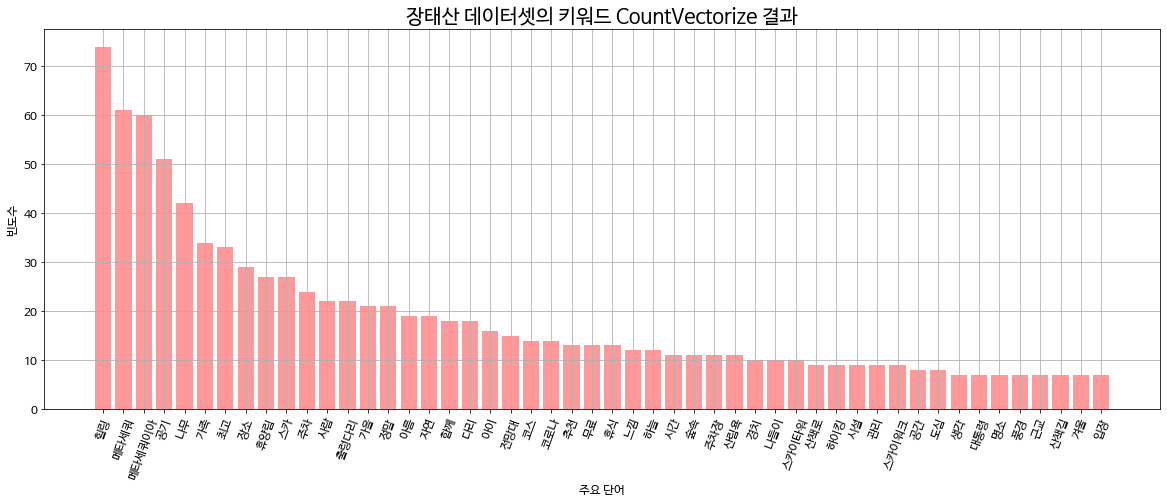


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


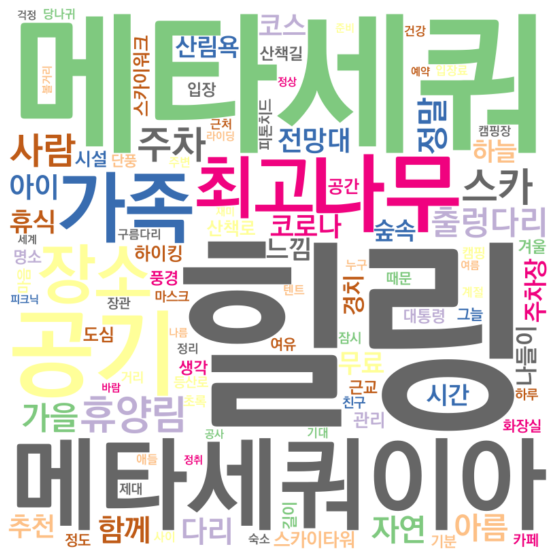


KEYWORD:  gyejok_mountain
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 499
_noun_scores_ 164
after postprocessing 107
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '합니다', '추천합니다', '가능합니다', '필요합니다', '보입니다', '감사합니다', '유명합니다', '강추합니다', '만족합니다', '편안합니다', '시원합니다', '사랑합니다', '볼만합니다', '불편합니다', '부족합니다', '혼잡합니다', '행복합니다', '생각합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '훌륭합니다', '깔끔합니다', '편리합니다', '깨끗합니다', '제공합니다', '적합합니다', '좋아합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['걷기', '걷기', '좋음', '좋음', '힘들지', '맨발걷기', '맨발걷기', '입구', '어렵지', '즐기기', '즐기기', '높지', '내려다보', '좋지', '이렇게', '늦게', '있기', '있기', '많지', '길지', '다니기', '다니기

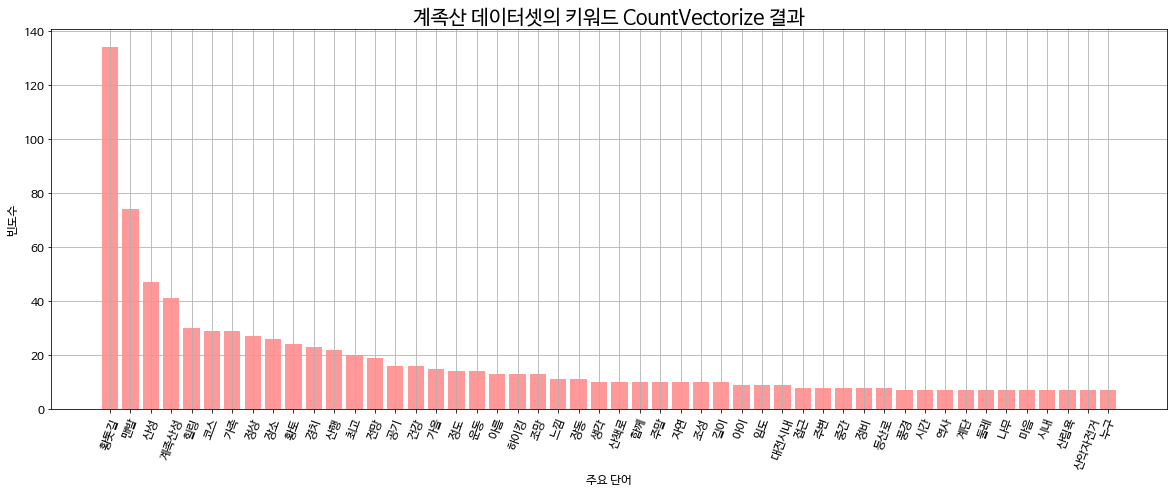


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


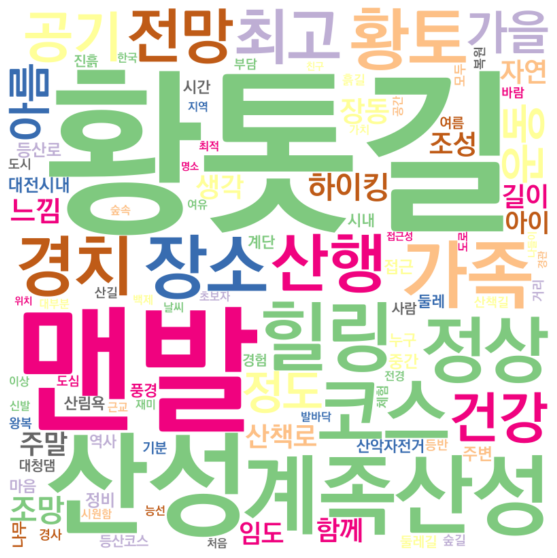


KEYWORD:  dongchundang
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 237
_noun_scores_ 97
after postprocessing 61
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '제공합니다', '감사합니다', '합니다', '보입니다', '가능합니다', '불편합니다', '추천합니다', '필요합니다', '부족합니다', '유명합니다', '혼잡합니다', '강추합니다', '행복합니다', '만족합니다', '생각합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '훌륭합니다', '깔끔합니다', '편안합니다', '편리합니다', '시원합니다', '깨끗합니다', '사랑합니다', '볼만합니다', '적합합니다', '좋아합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '놀기', '놀기', '걷기', '걷기', '오시기', '오시기', '좋은데', '있기', '있기', '취하기', '취하기', '맛있음', '맛있음', '찾기', '찾기', '곳이기', '찍기', '찍기', '드라', '힘들지', '좋지', 

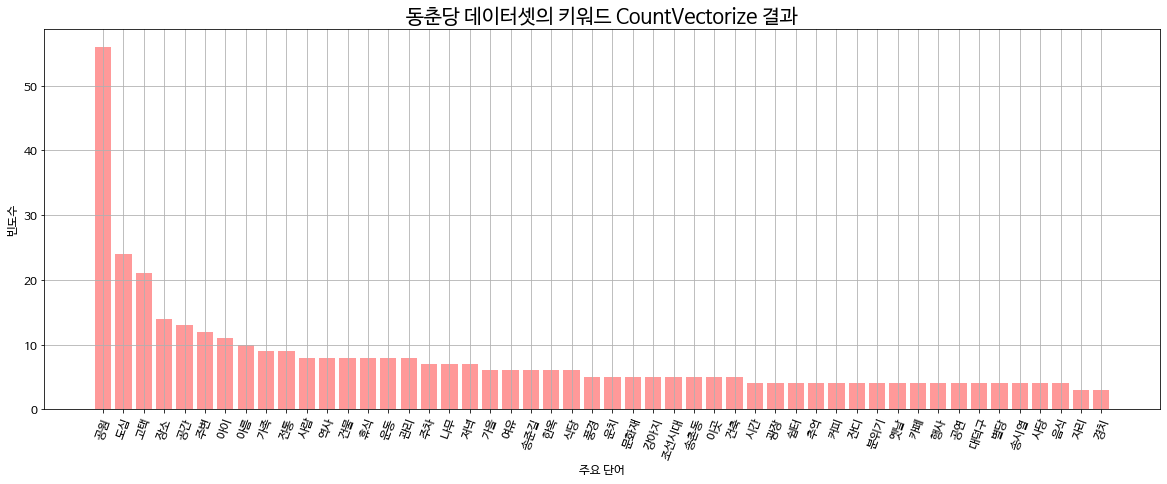


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


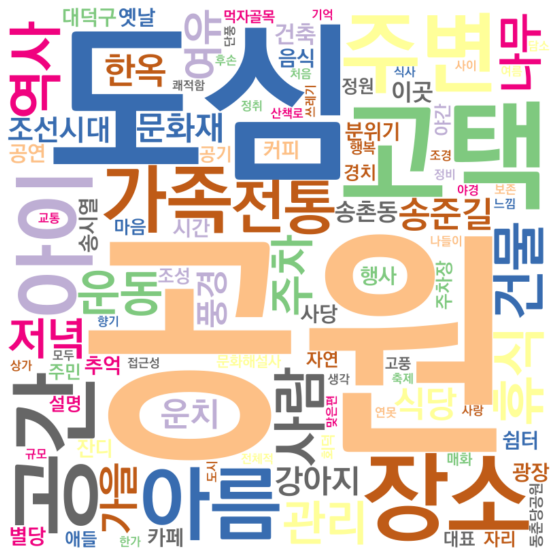


KEYWORD:  uineungjeongi_street
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 262
_noun_scores_ 93
after postprocessing 57
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '합니다', '볼만합니다', '가능합니다', '불편합니다', '추천합니다', '필요합니다', '강추합니다', '저렴합니다', '감사합니다', '부족합니다', '유명합니다', '혼잡합니다', '행복합니다', '만족합니다', '생각합니다', '친절합니다', '비슷합니다', '다양합니다', '훌륭합니다', '깔끔합니다', '편안합니다', '편리합니다', '시원합니다', '깨끗합니다', '사랑합니다', '제공합니다', '적합합니다', '보입니다', '좋아합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '좋은데', '놀기', '놀기', '다니기', '다니기', '걷기', '걷기', '좋지', '이렇게', '즐기기', '즐기기', '많지', '곳이기', '재밌고', '찍기', '찍기', '드라', '힘들지', '늦게', '둘러보

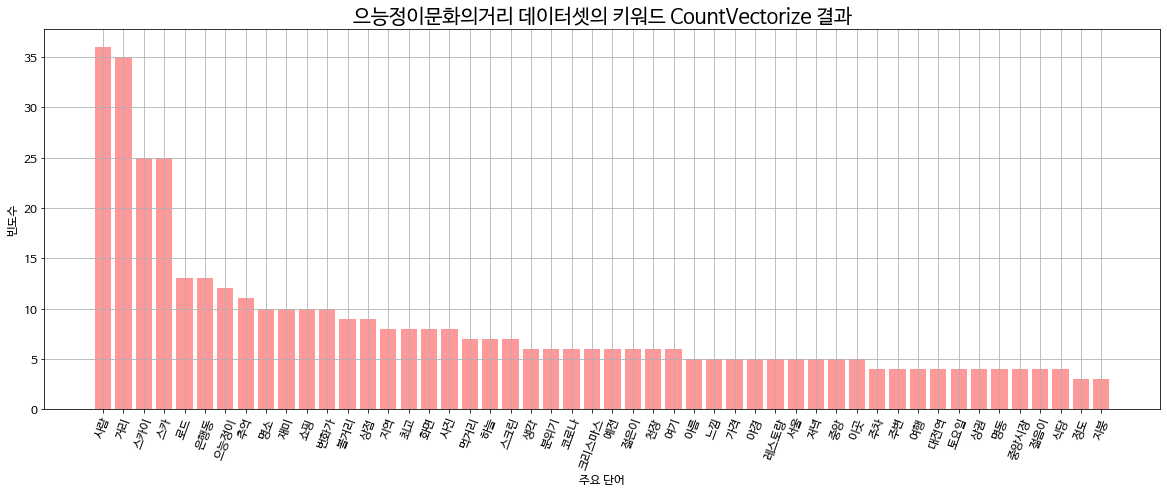


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


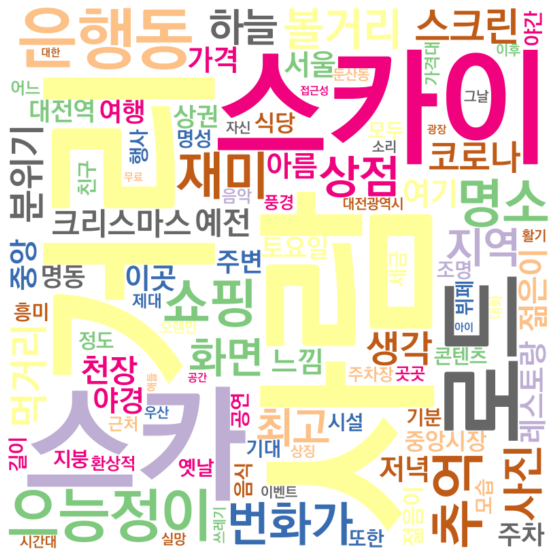


KEYWORD:  ppuri_park
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 407
_noun_scores_ 141
after postprocessing 92
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '합니다', '추천합니다', '만족합니다', '생각합니다', '깨끗합니다', '사랑합니다', '볼만합니다', '제공합니다', '보입니다', '좋아합니다', '가능합니다', '불편합니다', '필요합니다', '감사합니다', '부족합니다', '유명합니다', '혼잡합니다', '강추합니다', '행복합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '훌륭합니다', '깔끔합니다', '편안합니다', '편리합니다', '시원합니다', '적합합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '놀기', '놀기', '찾기', '찾기', '즐기기', '즐기기', '드라', '좋은데', '걷기', '걷기', '좋지', '이렇게', '다녀오기', '다녀오기', '늦게', '둘러보기', '둘러보기', '곳이기', '놀다', '다니기', '다

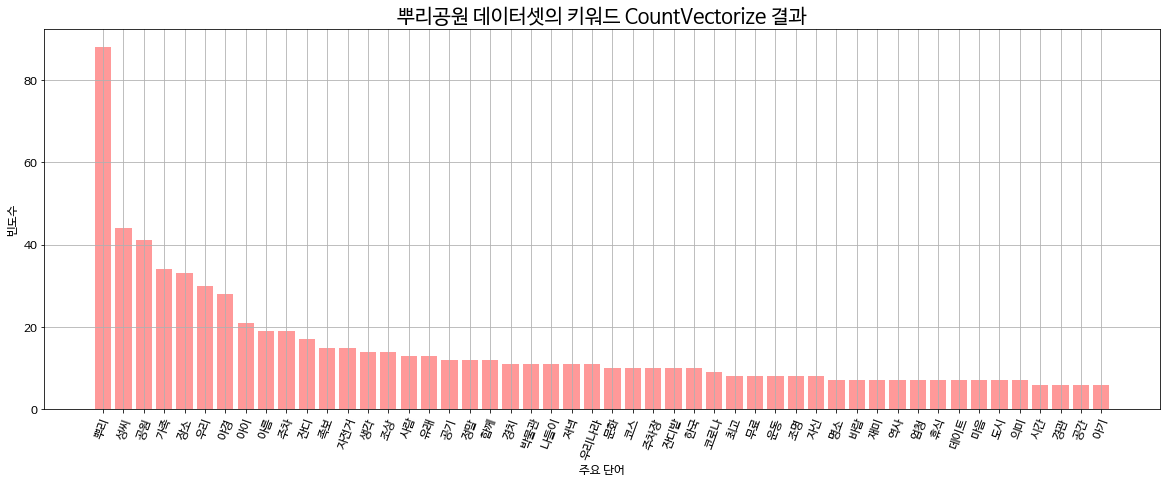


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


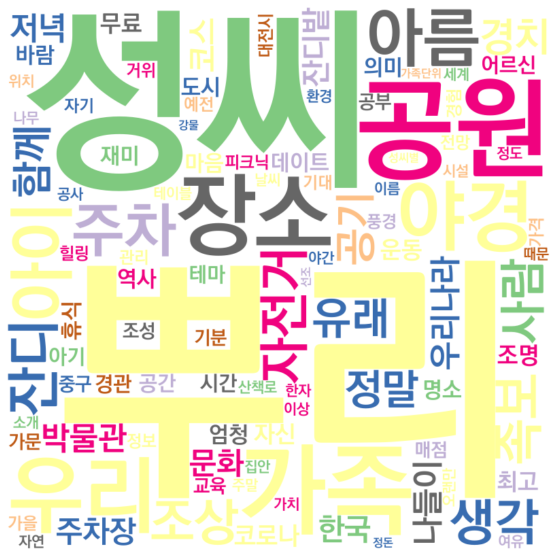


KEYWORD:  expo_science_park
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 691
_noun_scores_ 215
after postprocessing 131
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '합니다', '추천합니다', '볼만합니다', '좋아합니다', '가능합니다', '혼잡합니다', '저렴합니다', '훌륭합니다', '보입니다', '불편합니다', '필요합니다', '감사합니다', '부족합니다', '유명합니다', '강추합니다', '행복합니다', '만족합니다', '생각합니다', '친절합니다', '비슷합니다', '다양합니다', '깔끔합니다', '편안합니다', '편리합니다', '시원합니다', '깨끗합니다', '사랑합니다', '제공합니다', '적합합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '찍기', '찍기', '걷기', '걷기', '좋지', '좋은데', '보내기', '보내기', '이렇게', '놀기', '놀기', '드라', '즐기기', '즐기기', '많지', '다니기', '다니기', '없기', '없기', '가지만',

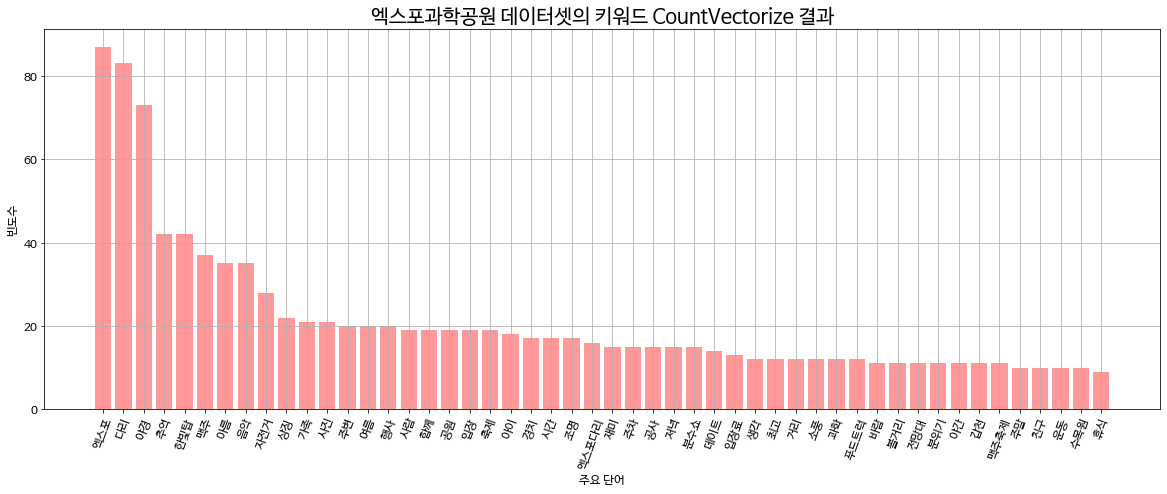


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


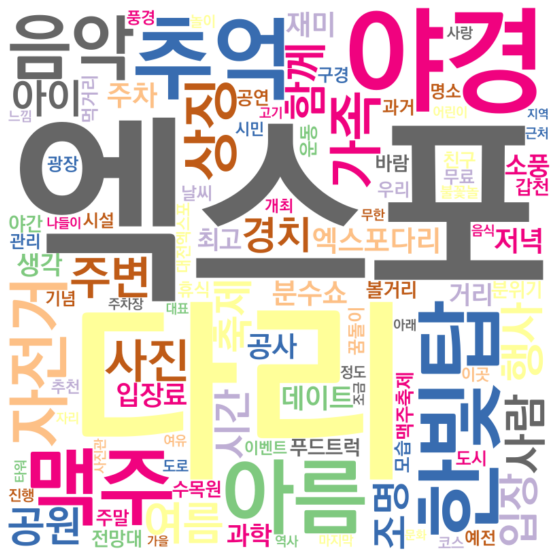


KEYWORD:  sungsimdang_bakery
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 1839
_noun_scores_ 480
after postprocessing 269
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '합니다', '추천합니다', '생각합니다', '좋아합니다', '다양합니다', '보입니다', '가능합니다', '유명합니다', '행복합니다', '친절합니다', '훌륭합니다', '혼잡합니다', '강추합니다', '만족합니다', '비슷합니다', '깔끔합니다', '편안합니다', '불편합니다', '부족합니다', '저렴합니다', '편리합니다', '필요합니다', '감사합니다', '시원합니다', '깨끗합니다', '사랑합니다', '볼만합니다', '제공합니다', '적합합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['맛있음', '맛있음', '좋음', '좋음', '좋은데', '많지', '좋지', '이렇게', '늦게', '가지만', '입구', '있기', '있기', '파리바게뜨', '먹음직', '찾기', '찾기', '힘들지', '없기', '없기', '높지', '즐

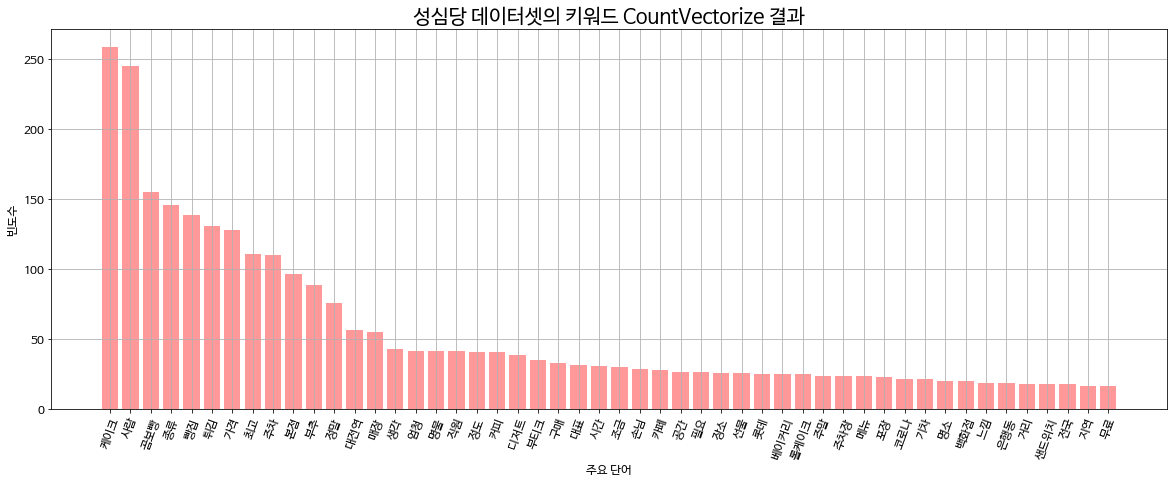


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


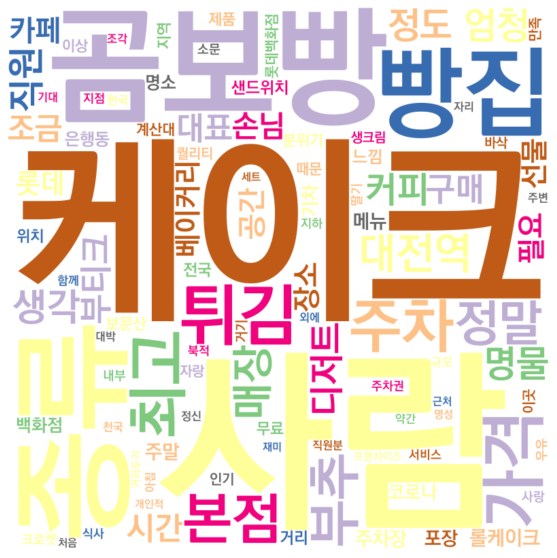


KEYWORD:  water_barrel
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 577
_noun_scores_ 185
after postprocessing 116
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '추천합니다', '시원합니다', '강추합니다', '깨끗합니다', '필요합니다', '행복합니다', '훌륭합니다', '사랑합니다', '좋아합니다', '가능합니다', '불편합니다', '감사합니다', '부족합니다', '유명합니다', '혼잡합니다', '만족합니다', '생각합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '깔끔합니다', '편안합니다', '편리합니다', '볼만합니다', '제공합니다', '적합합니다', '합니다', '보입니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '걷기', '걷기', '입구', '즐기기', '즐기기', '좋지', '좋은데', '놀기', '놀기', '힘들지', '이렇게', '많지', '길지', '보내기', '보내기', '놀다', '어렵지', '다녀오기', '다녀오기', '드라', '

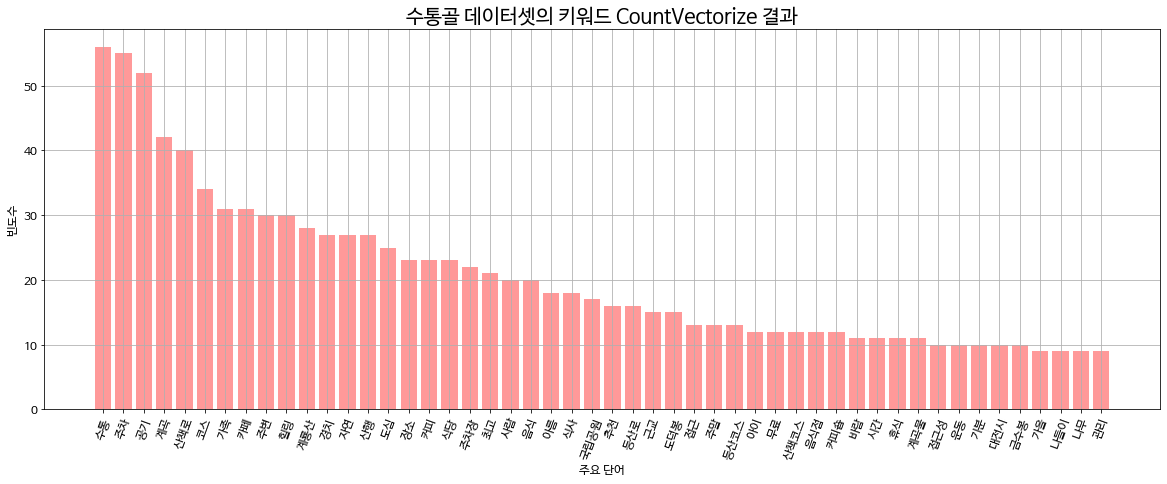


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


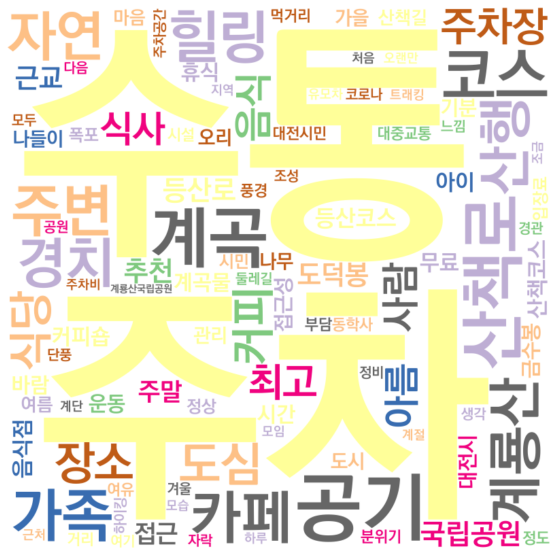


KEYWORD:  yuseong_hotspring
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 397
_noun_scores_ 121
after postprocessing 68
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '합니다', '가능합니다', '깨끗합니다', '추천합니다', '유명합니다', '강추합니다', '생각합니다', '편리합니다', '시원합니다', '적합합니다', '보입니다', '불편합니다', '필요합니다', '감사합니다', '부족합니다', '혼잡합니다', '행복합니다', '만족합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '훌륭합니다', '깔끔합니다', '편안합니다', '사랑합니다', '볼만합니다', '제공합니다', '좋아합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '이렇게', '좋은데', '좋지', '있기', '있기', '찍기', '찍기', '걷기', '걷기', '즐기기', '즐기기', '취하기', '취하기', '많지', '어렵지', '드라', '힘들지', '늦게', '둘러보기', '둘러보기

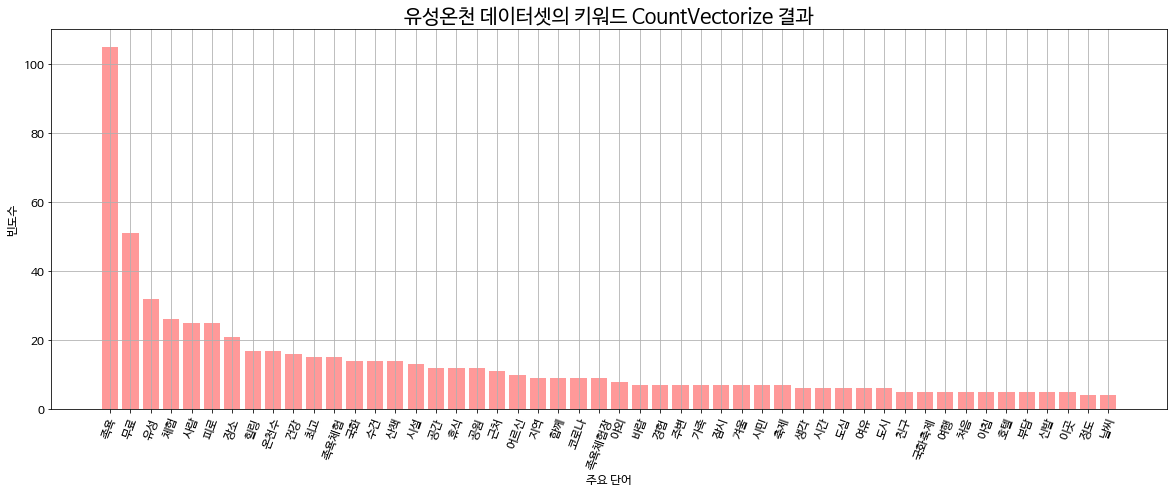


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


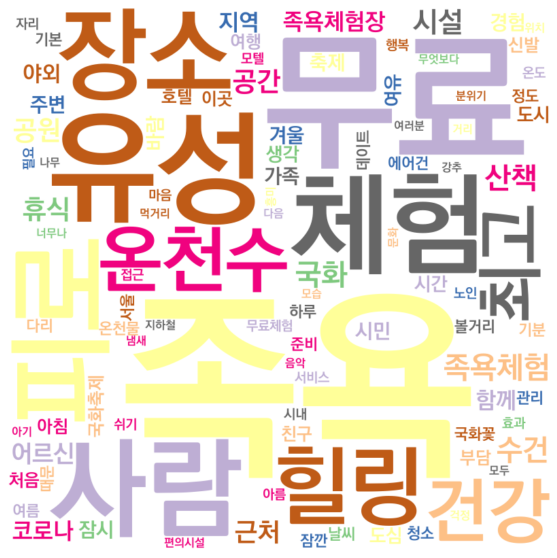


KEYWORD:  hanbat_arboretum
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 405
_noun_scores_ 151
after postprocessing 91
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '추천합니다', '합니다', '감사합니다', '훌륭합니다', '편리합니다', '적합합니다', '가능합니다', '불편합니다', '필요합니다', '부족합니다', '유명합니다', '혼잡합니다', '강추합니다', '행복합니다', '만족합니다', '생각합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '깔끔합니다', '편안합니다', '시원합니다', '깨끗합니다', '사랑합니다', '볼만합니다', '제공합니다', '보입니다', '좋아합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '걷기', '걷기', '놀기', '놀기', '보내기', '보내기', '이렇게', '찍기', '찍기', '많지', '놀다', '좋은데', '좋지', '둘러보기', '둘러보기', '즐기기', '즐기기', '나오기', '나오기', '입구'

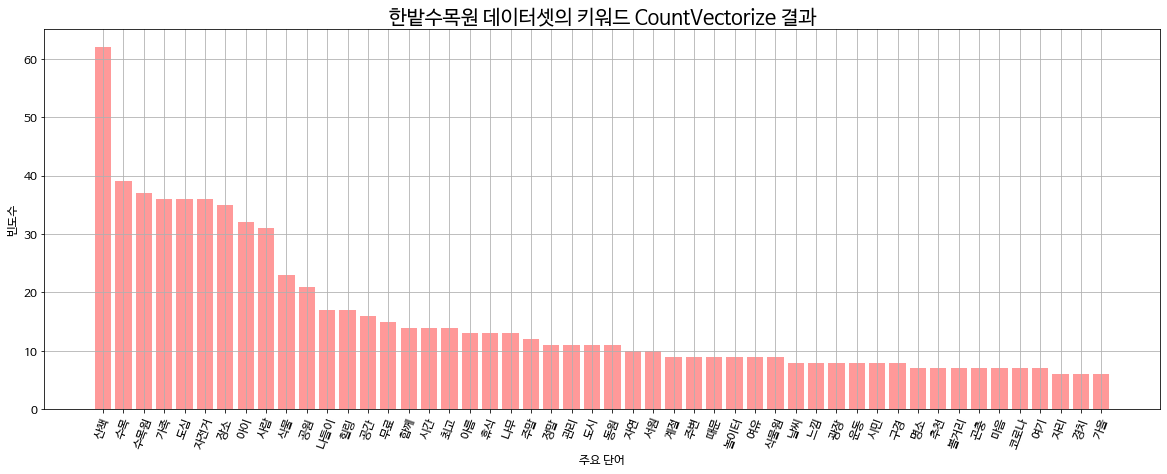


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


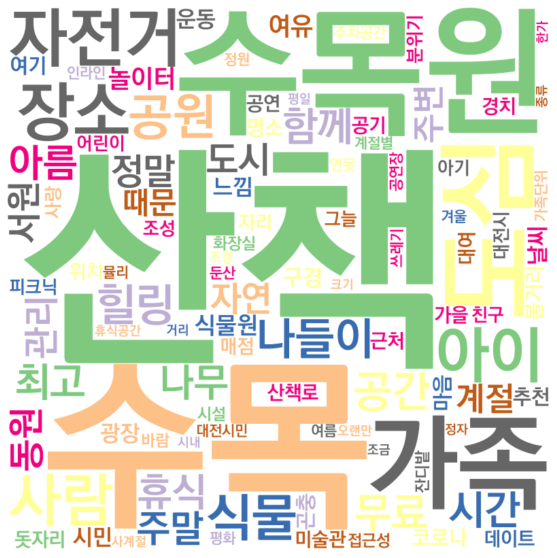


KEYWORD:  science_museum
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 368
_noun_scores_ 114
after postprocessing 73
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '좋아합니다', '강추합니다', '만족합니다', '합니다', '가능합니다', '추천합니다', '필요합니다', '부족합니다', '보입니다', '불편합니다', '감사합니다', '유명합니다', '혼잡합니다', '행복합니다', '생각합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '훌륭합니다', '깔끔합니다', '편안합니다', '편리합니다', '시원합니다', '깨끗합니다', '사랑합니다', '볼만합니다', '제공합니다', '적합합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '보내기', '보내기', '놀기', '놀기', '좋은데', '재밌고', '이렇게', '놀다', '힘들지', '늦게', '둘러보기', '둘러보기', '즐기기', '즐기기', '많지', '입구', '다니기', '다니기', '찍기', '찍기'

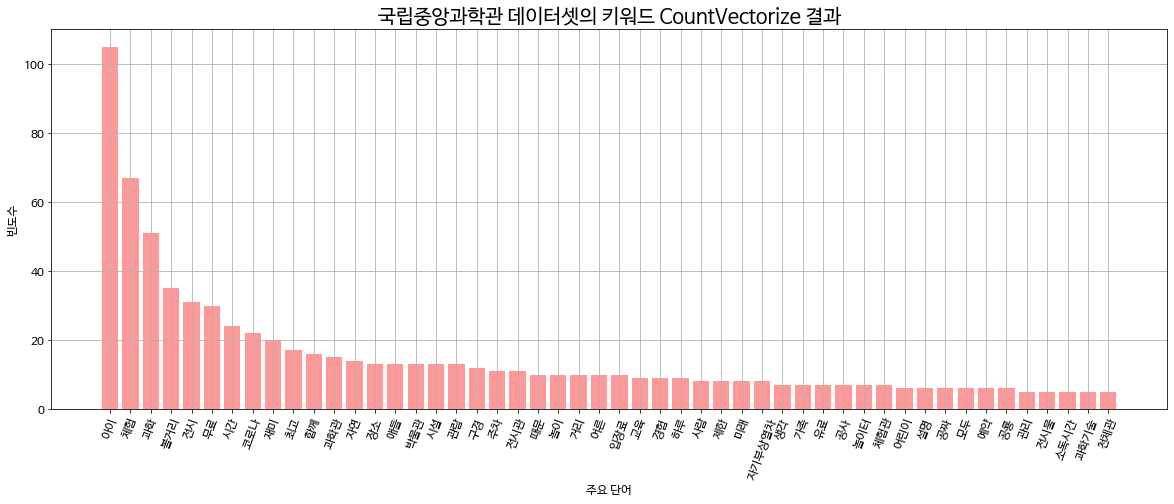


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


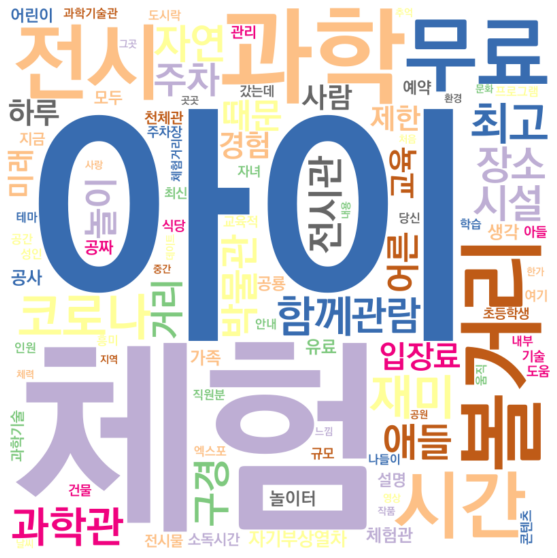


KEYWORD:  daecheong_lake
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 380
_noun_scores_ 137
after postprocessing 89
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '합니다', '추천합니다', '보입니다', '가능합니다', '불편합니다', '필요합니다', '감사합니다', '부족합니다', '유명합니다', '혼잡합니다', '강추합니다', '행복합니다', '만족합니다', '생각합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '훌륭합니다', '깔끔합니다', '편안합니다', '편리합니다', '시원합니다', '깨끗합니다', '사랑합니다', '볼만합니다', '제공합니다', '적합합니다', '좋아합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['드라', '좋음', '좋음', '좋은데', '걷기', '걷기', '찍기', '찍기', '둘러보기', '둘러보기', '놀기', '놀기', '있기', '있기', '힘들지', '좋지', '이렇게', '늦게', '즐기기', '즐기기', '없기', '없기', '취하

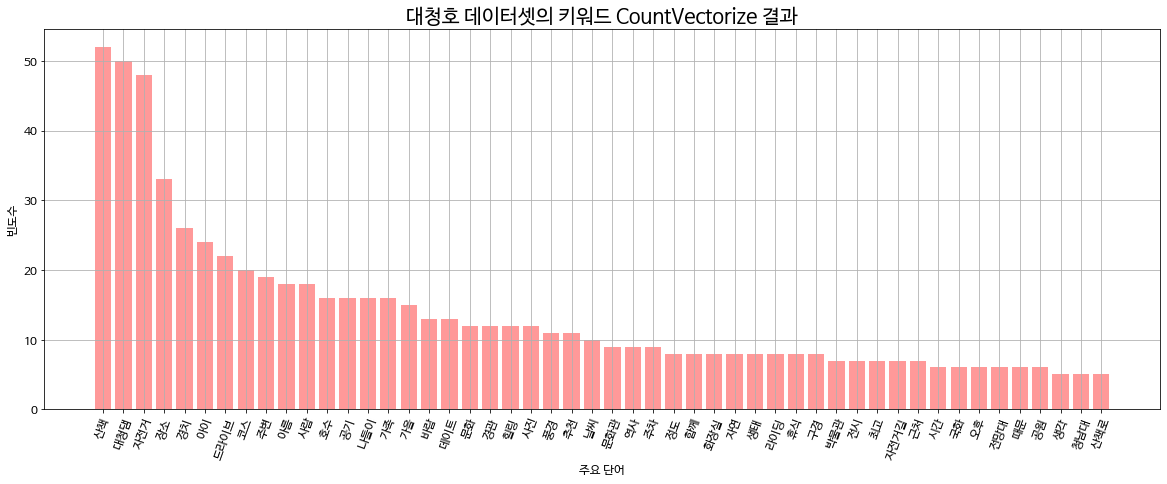


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


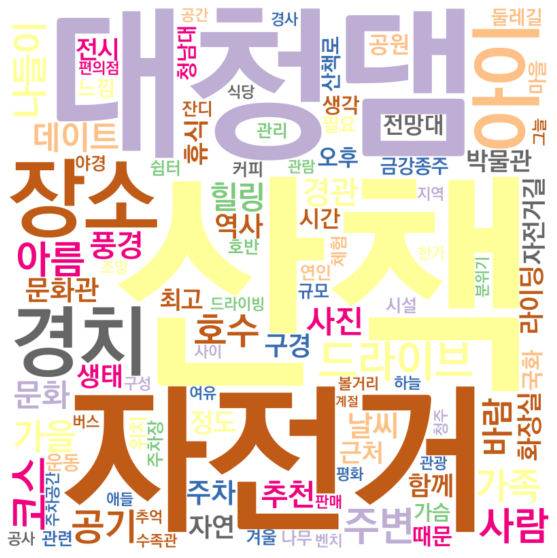


KEYWORD:  art_culture_complex
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 838
_noun_scores_ 260
after postprocessing 157
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '추천합니다', '감사합니다', '합니다', '저렴합니다', '친절합니다', '가능합니다', '강추합니다', '행복합니다', '훌륭합니다', '깔끔합니다', '편리합니다', '깨끗합니다', '제공합니다', '보입니다', '좋아합니다', '불편합니다', '필요합니다', '부족합니다', '유명합니다', '혼잡합니다', '만족합니다', '생각합니다', '비슷합니다', '다양합니다', '편안합니다', '시원합니다', '사랑합니다', '볼만합니다', '적합합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋음', '좋음', '좋은데', '즐기기', '즐기기', '많지', '입구', '보내기', '보내기', '둘러보기', '둘러보기', '있기', '있기', '좋지', '이렇게', '늦게', '놀기', '놀기', '취하기', '취하기', '찾기', 

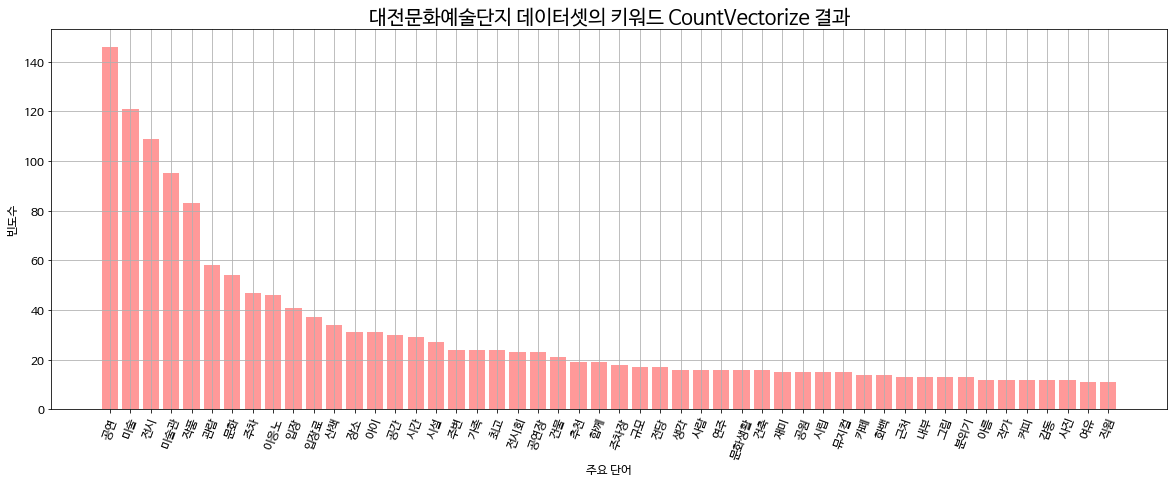


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


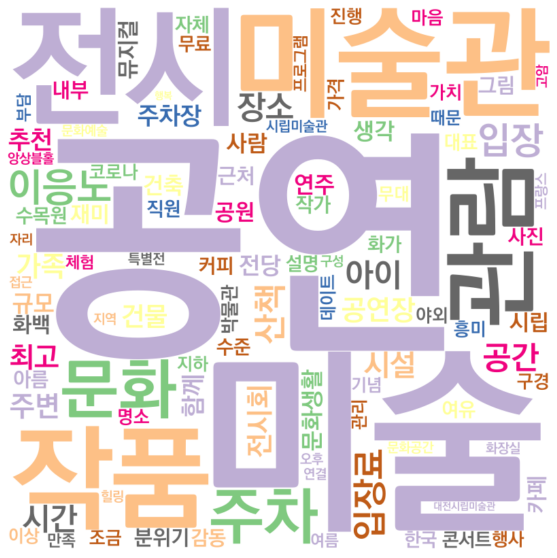


KEYWORD:  observatory
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 22
_noun_scores_ 12
after postprocessing 6
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['합니다', '가능합니다', '추천합니다', '좋아요', '보입니다', '불편합니다', '필요합니다', '감사합니다', '부족합니다', '유명합니다', '혼잡합니다', '강추합니다', '행복합니다', '만족합니다', '생각합니다', '친절합니다', '저렴합니다', '비슷합니다', '다양합니다', '훌륭합니다', '깔끔합니다', '편안합니다', '편리합니다', '시원합니다', '깨끗합니다', '사랑합니다', '볼만합니다', '제공합니다', '적합합니다', '좋아합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['좋지', '보내기', '보내기', '찍기', '찍기', '좋음', '좋음', '드라', '힘들지', '좋은데', '걷기', '걷기', '이렇게', '늦게', '둘러보기', '둘러보기', '있기', '있기', '즐기기', '즐기기', '없기', '없기', '놀기', '

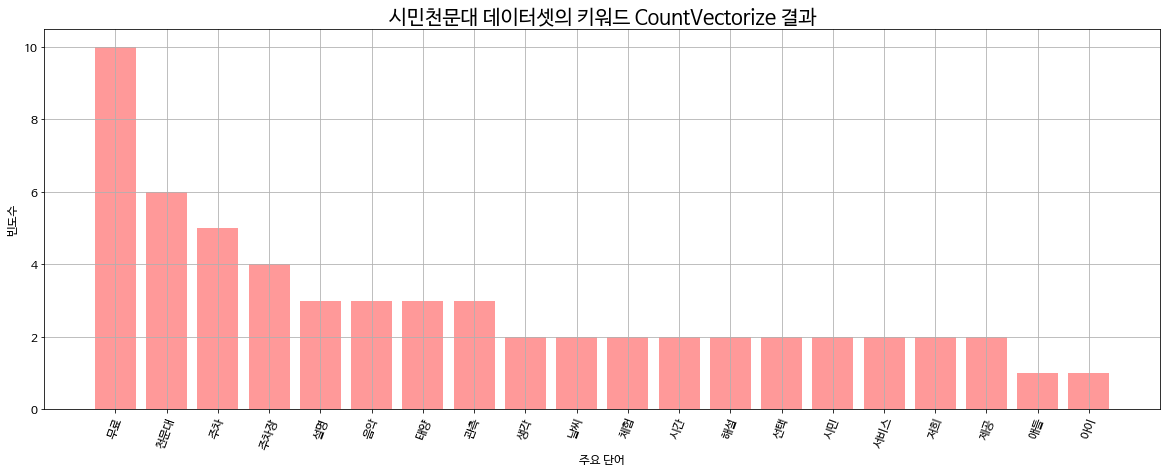


==== 20 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


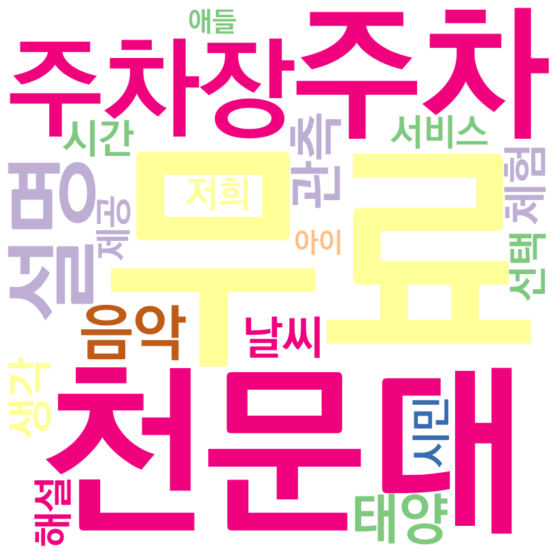


KEYWORD:  oworld_zoo
==== 명사 추출 ====
== extractor: LRNounExtractor
----------------------------------------------------------------------------------------------------
== extractor: LRNounExtractor_v2
----------------------------------------------------------------------------------------------------
== extractor: NewsNounExtractor
before postprocessing 487
_noun_scores_ 129
after postprocessing 83
----------------------------------------------------------------------------------------------------

==== 마치는 문자 확인 및 명사 분리 ====
제거된 단어들:  ['좋아요', '좋아합니다', '추천합니다', '필요합니다', '비슷합니다', '합니다', '보입니다', '가능합니다', '불편합니다', '감사합니다', '부족합니다', '유명합니다', '혼잡합니다', '강추합니다', '행복합니다', '만족합니다', '생각합니다', '친절합니다', '저렴합니다', '다양합니다', '훌륭합니다', '깔끔합니다', '편안합니다', '편리합니다', '시원합니다', '깨끗합니다', '사랑합니다', '볼만합니다', '제공합니다', '적합합니다']

==== 품사 태깅 기준 용언 및 ETN 제거 ====
제거된 단어들:  ['놀기', '놀기', '좋음', '좋음', '놀다', '좋지', '많지', '재밌고', '찍기', '찍기', '드라', '늦게', '입구', '다녀오기', '다녀오기', '다니기', '다니기', '힘들지', '좋은데', '이렇게', '둘러보기', '둘러보기', '있

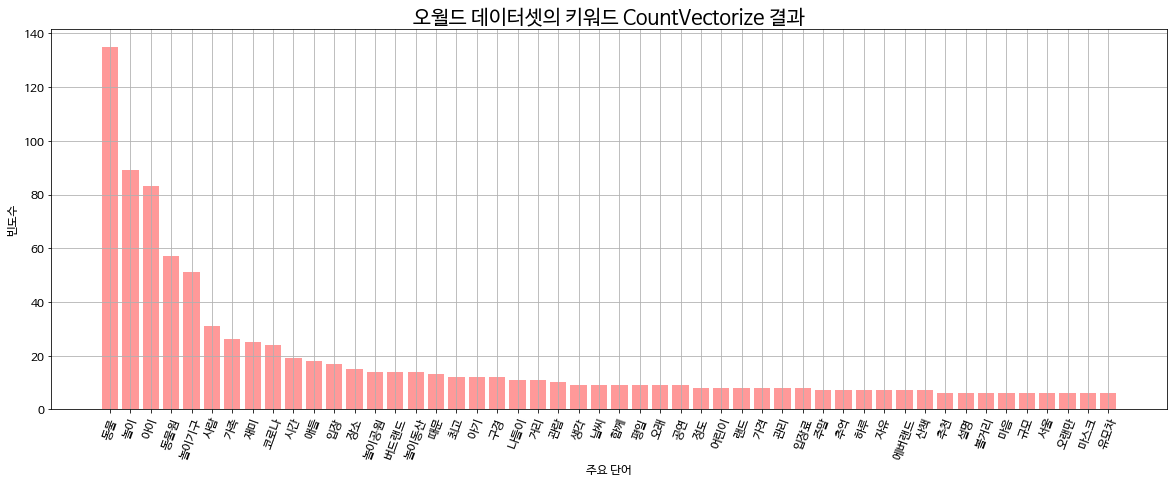


==== 100 순위까지 사전으로 저장 및 워드 클라우드 시각화 ====

==== 워드 클라우드 시각화 및 저장  ====
<class 'numpy.ndarray'>
(800, 800, 3)


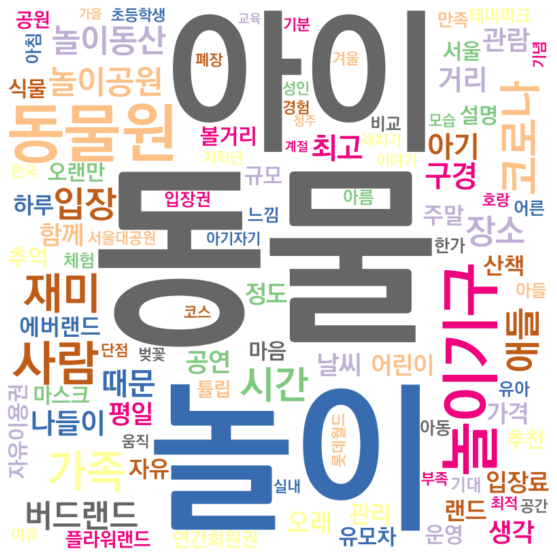

In [39]:
for keyword in keywords.values():
    print()
    print('KEYWORD: ',keyword)
    keywordCloud(keyword)